<a href="https://colab.research.google.com/github/Engyogesh/miniproject/blob/main/HR_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from tabulate import tabulate
import traceback
import numpy as np
import matplotlib.pyplot as plt
from requests import get
import requests
import os


In [38]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [40]:
import pandas as pd
Data = pd.read_excel(r'/content/gdrive/My Drive/mini project/HR DATA.xlsx')

In [41]:
display(pd.DataFrame(Data))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.380000,0.380000,0.38,0.380000,0.380000,0.38,0.38,0.38,accounting,low
1,0.090000,0.620000,6.00,294.000000,4.000000,0.00,1.00,0.00,accounting,low
2,0.450000,0.570000,2.00,134.000000,3.000000,0.00,1.00,0.00,hr,low
3,0.400000,0.510000,2.00,145.000000,3.000000,0.00,1.00,0.00,hr,low
4,0.450000,0.550000,2.00,140.000000,3.000000,0.00,1.00,0.00,hr,low
5,0.840000,0.870000,4.00,246.000000,6.000000,0.00,1.00,0.00,hr,low
6,0.100000,0.940000,6.00,255.000000,4.000000,0.00,1.00,0.00,technical,low
7,0.380000,0.460000,2.00,137.000000,3.000000,0.00,1.00,0.00,technical,low
8,0.450000,0.500000,2.00,126.000000,3.000000,0.00,1.00,0.00,techanical,low
9,0.483929,0.639286,2.50,145.785714,3.571429,0.00,1.00,0.00,techanical,low


In [58]:
department_employee_count = df.groupby('sales').size().reset_index(name='num_employees')
department_employee_count.insert(0, 'Serial No', range(1, len(department_employee_count) + 1))
print("Department-wise Employee Count")
print(tabulate(department_employee_count, headers='keys', tablefmt='grid', showindex=False))

Department-wise Employee Count
+-------------+------------+-----------------+
|   Serial No | sales      |   num_employees |
+=============+============+=================+
|           1 | accounting |               2 |
+-------------+------------+-----------------+
|           2 | hr         |               4 |
+-------------+------------+-----------------+
|           3 | technical  |               4 |
+-------------+------------+-----------------+


In [59]:
left_employees_department = df[df['left'] == 1].groupby('sales').size().reset_index(name='num_employees')
left_employees_department['rank'] = left_employees_department['num_employees'].rank(ascending=False)
left_employees_department.insert(0, 'Serial No', range(1, len(left_employees_department) + 1))
print("\nDepartment-wise Employee Count of Employees Who Left and Their Rank")
print(tabulate(left_employees_department, headers='keys', tablefmt='grid', showindex=False))


Department-wise Employee Count of Employees Who Left and Their Rank
+-------------+------------+-----------------+--------+
|   Serial No | sales      |   num_employees |   rank |
+=============+============+=================+========+
|           1 | accounting |               2 |    3   |
+-------------+------------+-----------------+--------+
|           2 | hr         |               4 |    1.5 |
+-------------+------------+-----------------+--------+
|           3 | technical  |               4 |    1.5 |
+-------------+------------+-----------------+--------+


In [47]:
avg_time_hours = df.groupby(['sales', 'left']).agg(
    avg_time_spend_company=('time_spend_company', 'mean'),
    avg_average_monthly_hours=('average_montly_hours', 'mean')
).reset_index()

# Pivot table for heatmap
heatmap_data = avg_time_hours.pivot(index='sales', columns='left', values=['avg_time_spend_company', 'avg_average_monthly_hours'])

# Reset index to flatten the pivot table for tabulate
heatmap_data_reset = heatmap_data.reset_index()

# Add serial number column
heatmap_data_reset.insert(0, 'Serial No', range(1, len(heatmap_data_reset) + 1))

# Print the table with a dotted line
print("\nHeatmap Data for Average Time Spent and Monthly Hours by Department and Left Status")
print(tabulate(heatmap_data_reset, headers='keys', tablefmt='grid', showindex=False))


Heatmap Data for Average Time Spent and Monthly Hours by Department and Left Status
+---------------------+-----------------+---------------------------------+------------------------------------+
|   ('Serial No', '') | ('sales', '')   |   ('avg_time_spend_company', 1) |   ('avg_average_monthly_hours', 1) |
+=====================+=================+=================================+====================================+
|                   1 | accounting      |                            3.5  |                             213    |
+---------------------+-----------------+---------------------------------+------------------------------------+
|                   2 | hr              |                            3.75 |                             166.25 |
+---------------------+-----------------+---------------------------------+------------------------------------+
|                   3 | technical       |                            3.5  |                             206    |
+----------

In [49]:
accident_promotion_stats = df.groupby(["left", "sales"]).agg(
    count_work_accident=("Work_accident", "sum"),
    count_promotion_last_5years=("promotion_last_5years", "sum")
).reset_index()

# Sort by 'sales'
accident_promotion_stats_sorted = accident_promotion_stats.sort_values(by="sales")

# Add serial number column
accident_promotion_stats_sorted.insert(0, 'Serial No', range(1, len(accident_promotion_stats_sorted) + 1))

# Print the table with a dotted line
print("\nCount of Work Accidents and Promotions by Department and Left Status")
print(tabulate(accident_promotion_stats_sorted, headers='keys', tablefmt='grid', showindex=False))


Count of Work Accidents and Promotions by Department and Left Status
+-------------+--------+------------+-----------------------+-------------------------------+
|   Serial No |   left | sales      |   count_work_accident |   count_promotion_last_5years |
+=============+========+============+=======================+===============================+
|           1 |      1 | accounting |                     0 |                             0 |
+-------------+--------+------------+-----------------------+-------------------------------+
|           2 |      1 | hr         |                     0 |                             0 |
+-------------+--------+------------+-----------------------+-------------------------------+
|           3 |      1 | technical  |                     0 |                             0 |
+-------------+--------+------------+-----------------------+-------------------------------+


In [50]:
eval_satisfaction_stats = df.groupby(["left", "sales"]).agg(
    min_last_evaluation=("last_evaluation", "min"),
    max_last_evaluation=("last_evaluation", "max"),
    avg_last_evaluation=("last_evaluation", "mean"),
    min_satisfaction_level=("satisfaction_level", "min"),
    max_satisfaction_level=("satisfaction_level", "max"),
    avg_satisfaction_level=("satisfaction_level", "mean")
).reset_index()

# Sort by 'sales'
eval_satisfaction_stats_sorted = eval_satisfaction_stats.sort_values(by="sales")

# Add serial number column
eval_satisfaction_stats_sorted.insert(0, 'Serial No', range(1, len(eval_satisfaction_stats_sorted) + 1))

# Print the table with a dotted line
print("\nEvaluation and Satisfaction Statistics by Department and Left Status")
print(tabulate(eval_satisfaction_stats_sorted, headers='keys', tablefmt='grid', showindex=False))


Evaluation and Satisfaction Statistics by Department and Left Status
+-------------+--------+------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+
|   Serial No |   left | sales      |   min_last_evaluation |   max_last_evaluation |   avg_last_evaluation |   min_satisfaction_level |   max_satisfaction_level |   avg_satisfaction_level |
+=============+========+============+=======================+=======================+=======================+==========================+==========================+==========================+
|           1 |      1 | accounting |                  0.5  |                  0.62 |                0.56   |                     0.09 |                     0.38 |                    0.235 |
+-------------+--------+------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+---

In [54]:
min_max_time_hours = df.groupby(["left", "sales"]).agg(
    min_time_spend_company=("time_spend_company", "min"),
    max_time_spend_company=("time_spend_company", "max"),
    min_average_montly_hours=("average_montly_hours", "min"),
    max_average_montly_hours=("average_montly_hours", "max")
).reset_index()

# Sort the results by 'sales'
min_max_time_hours_sorted = min_max_time_hours.sort_values(by="sales")

# Add serial number column
min_max_time_hours_sorted.insert(0, 'Serial No', range(1, len(min_max_time_hours_sorted) + 1))

print("\nMinimum and Maximum Time Spent and Monthly Hours by Department and Left Status")
print(tabulate(min_max_time_hours_sorted, headers='keys', tablefmt='grid', showindex=False))



Minimum and Maximum Time Spent and Monthly Hours by Department and Left Status
+-------------+--------+------------+--------------------------+--------------------------+----------------------------+----------------------------+
|   Serial No |   left | sales      |   min_time_spend_company |   max_time_spend_company |   min_average_montly_hours |   max_average_montly_hours |
+=============+========+============+==========================+==========================+============================+============================+
|           1 |      1 | accounting |                        3 |                        4 |                        132 |                        294 |
+-------------+--------+------------+--------------------------+--------------------------+----------------------------+----------------------------+
|           2 |      1 | hr         |                        3 |                        6 |                        134 |                        246 |
+-------------+-----

In [55]:
avg_time_hours_sorted = df.groupby(["left", "sales"]).agg(
    avg_time_spend_company=("time_spend_company", "mean"),
    avg_average_montly_hours=("average_montly_hours", "mean")
).reset_index().sort_values(by="sales")

min_max_time_hours_sorted = df.groupby(["left", "sales"]).agg(
    min_time_spend_company=("time_spend_company", "min"),
    max_time_spend_company=("time_spend_company", "max"),
    min_average_montly_hours=("average_montly_hours", "min"),
    max_average_montly_hours=("average_montly_hours", "max")
).reset_index().sort_values(by="sales")
eval_satisfaction_stats_sorted = df.groupby(["left", "sales"]).agg(
    min_last_evaluation=("last_evaluation", "min"),
    max_last_evaluation=("last_evaluation", "max"),
    avg_last_evaluation=("last_evaluation", "mean"),
    min_satisfaction_level=("satisfaction_level", "min"),
    max_satisfaction_level=("satisfaction_level", "max"),
    avg_satisfaction_level=("satisfaction_level", "mean")
).reset_index().sort_values(by="sales")

accident_promotion_stats_sorted = df.groupby(["left", "sales"]).agg(
    count_work_accident=("Work_accident", "sum"),
    count_promotion_last_5years=("promotion_last_5years", "sum")
).reset_index().sort_values(by="sales")

# Merging data frames
merged_results = pd.merge(avg_time_hours_sorted, min_max_time_hours_sorted, on=["left", "sales"])
merged_results = pd.merge(merged_results, eval_satisfaction_stats_sorted, on=["left", "sales"])
merged_results = pd.merge(merged_results, accident_promotion_stats_sorted, on=["left", "sales"])

# Add serial number column
merged_results.insert(0, 'Serial No', range(1, len(merged_results) + 1))

# Print the table with grid lines
print("\nMerged Results Table")
print(tabulate(merged_results, headers='keys', tablefmt='grid', showindex=False))



Merged Results Table
+-------------+--------+------------+--------------------------+----------------------------+--------------------------+--------------------------+----------------------------+----------------------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+-----------------------+-------------------------------+
|   Serial No |   left | sales      |   avg_time_spend_company |   avg_average_montly_hours |   min_time_spend_company |   max_time_spend_company |   min_average_montly_hours |   max_average_montly_hours |   min_last_evaluation |   max_last_evaluation |   avg_last_evaluation |   min_satisfaction_level |   max_satisfaction_level |   avg_satisfaction_level |   count_work_accident |   count_promotion_last_5years |
+=============+========+============+==========================+============================+==========================+==========================+=

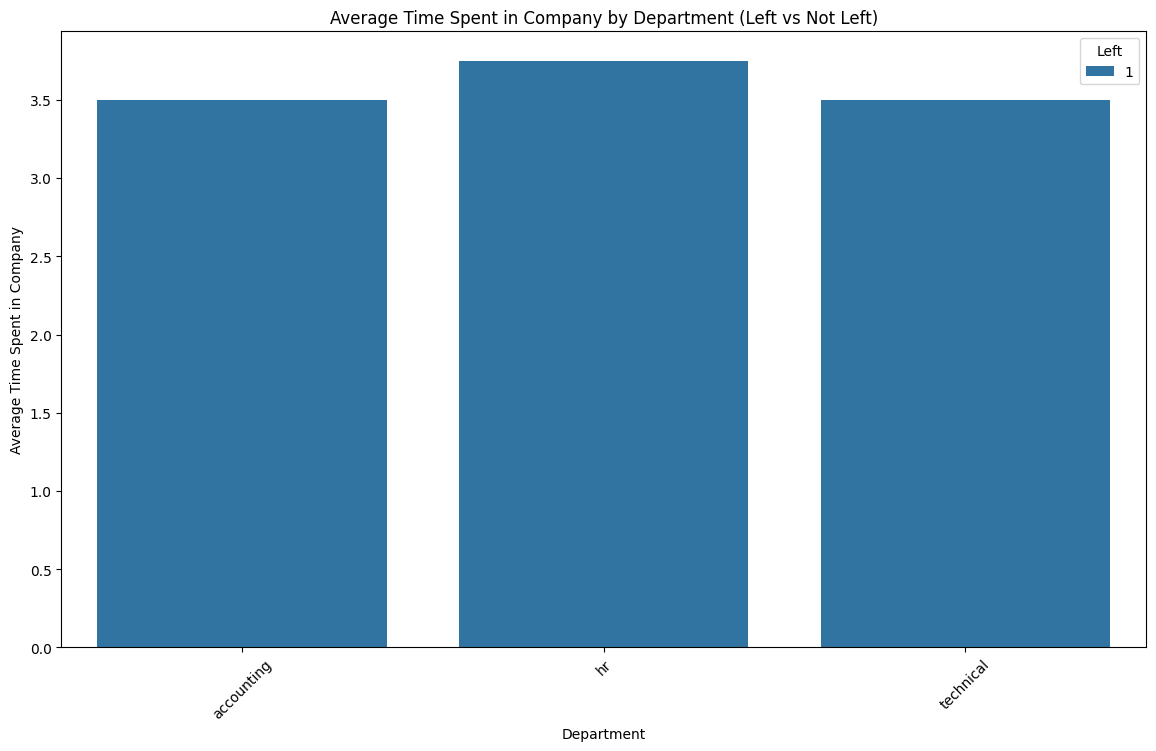

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure avg_time_hours_sorted DataFrame has the required columns: 'sales', 'avg_time_spend_company', 'left'

# Create the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='sales', y='avg_time_spend_company', hue='left', data=avg_time_hours_sorted)

# Set labels and title
plt.xlabel('Department')
plt.ylabel('Average Time Spent in Company')
plt.title('Average Time Spent in Company by Department (Left vs Not Left)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Left')

# Display the plot
plt.show()

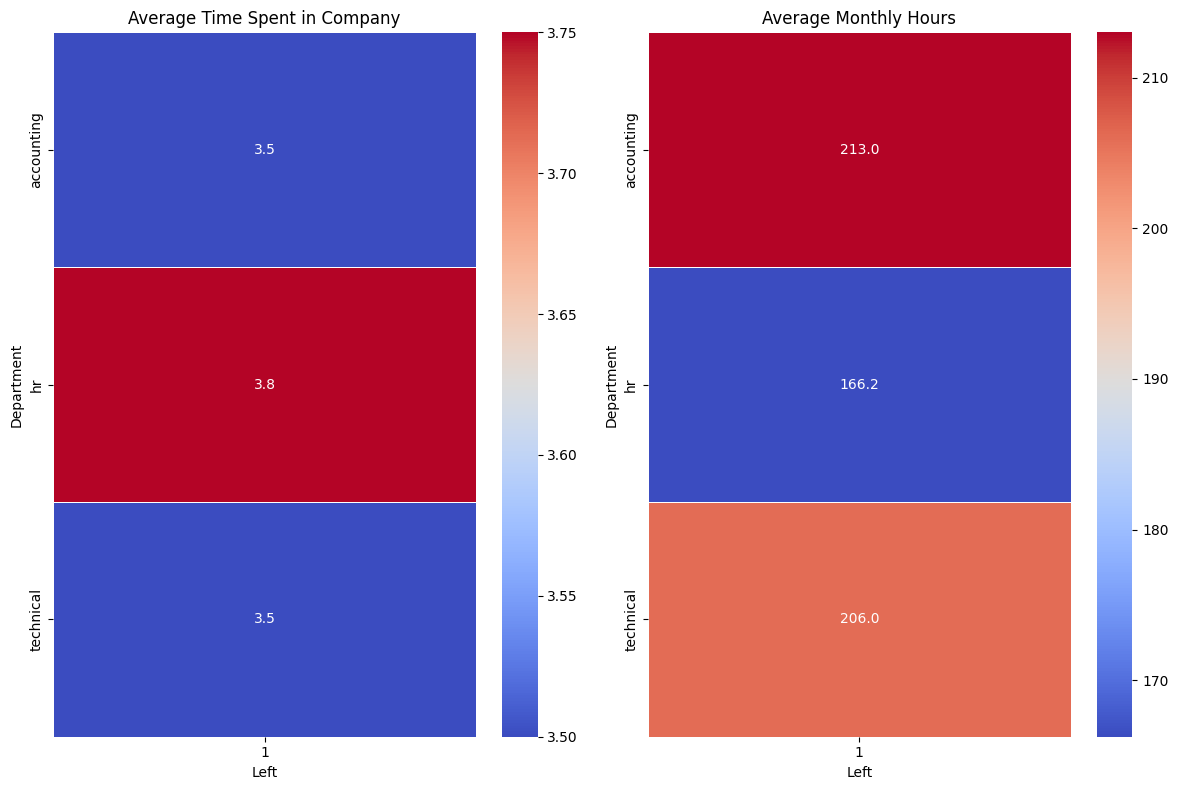

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

avg_time_hours = df.groupby(["left", "sales"]).agg(
    avg_time_spend_company=("time_spend_company", "mean"),
    avg_average_montly_hours=("average_montly_hours", "mean")
).reset_index()

# Pivot table for heatmap
heatmap_data = avg_time_hours.pivot(index='sales', columns='left', values=['avg_time_spend_company', 'avg_average_montly_hours'])

# Plot heatmap
plt.figure(figsize=(12, 8))

# Plot avg_time_spend_company
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data['avg_time_spend_company'], annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Average Time Spent in Company')
plt.xlabel('Left')
plt.ylabel('Department')

# Plot avg_average_montly_hours
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data['avg_average_montly_hours'], annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Average Monthly Hours')
plt.xlabel('Left')
plt.ylabel('Department')

plt.tight_layout()
plt.show()